In [1]:
# HPC
import netCDF4 as nc
import numpy as np
import xarray as xr

# Plotting
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import FormatStrFormatter

# Paths and stuff
import os
import sys

sys.path.append('/home/shreyas/pySICOPOLIS/src')
from pySICOPOLIS import *

In [2]:
### Load data

dataPath = '/scratch2/shreyas/GrIS_paleo_data/'
ds_temp = xr.open_dataset(dataPath + 'RDBTS4_Greenland_1993_2017_02_basal_thermal_state.nc')
ds_vel  = xr.open_dataset(dataPath + 'RDGBV4_Greenland_1993_2013_01_balance_velocity_9ka.nc')
ds_bm5  = xr.open_dataset(dataPath + 'BedMachineGreenland-v5.nc')
ds_age  = xr.open_dataset(dataPath + 'RRRAG4_Greenland_1993_2013_01_age_grid.nc')
ds_bm5_40kms = xr.load_dataset("/scratch2/shreyas/GrIS_paleo_data/bm5_data_40kms.nc")
ds_fake_bm5_40kms = xr.load_dataset("/scratch2/shreyas/GrIS_paleo_data/fake_bm5_data_40kms.nc")

# Convert metres to kms
ds_bm5['x'] = ds_bm5['x']*0.001
ds_bm5['y'] = ds_bm5['y']*0.001
ds_temp['x'] = ds_temp['x']*0.001
ds_temp['y'] = ds_temp['y']*0.001

### Load model outputs

modelPath = '/home/shreyas/update_to_develop_sicopolis/sicopolis_spinups/sico_out/grl40_bm5_paleo17a_CT4_BH0_8point5CS_spinup_0ka/'
ds_model = xr.open_dataset(modelPath + 'grl40_bm5_paleo17a_CT4_BH0_8point5CS_spinup_0ka0011.nc')
ds_model_nudged = xr.open_dataset("/home/shreyas/update_to_develop_sicopolis/sicopolis_spinups/sico_out/grl40_bm5_spinup02_smooth_100a/grl40_bm5_spinup02_smooth_100a0001.nc")

KeyError: "No variable named 'xModel'. Variables on the dataset include ['mapping', 'x', 'y', 'zs', 'zb', ..., 'zl_uncert_unbounded', 'H_uncert_unbounded', 'zl_uncert', 'H_uncert', 'zs_uncert']"

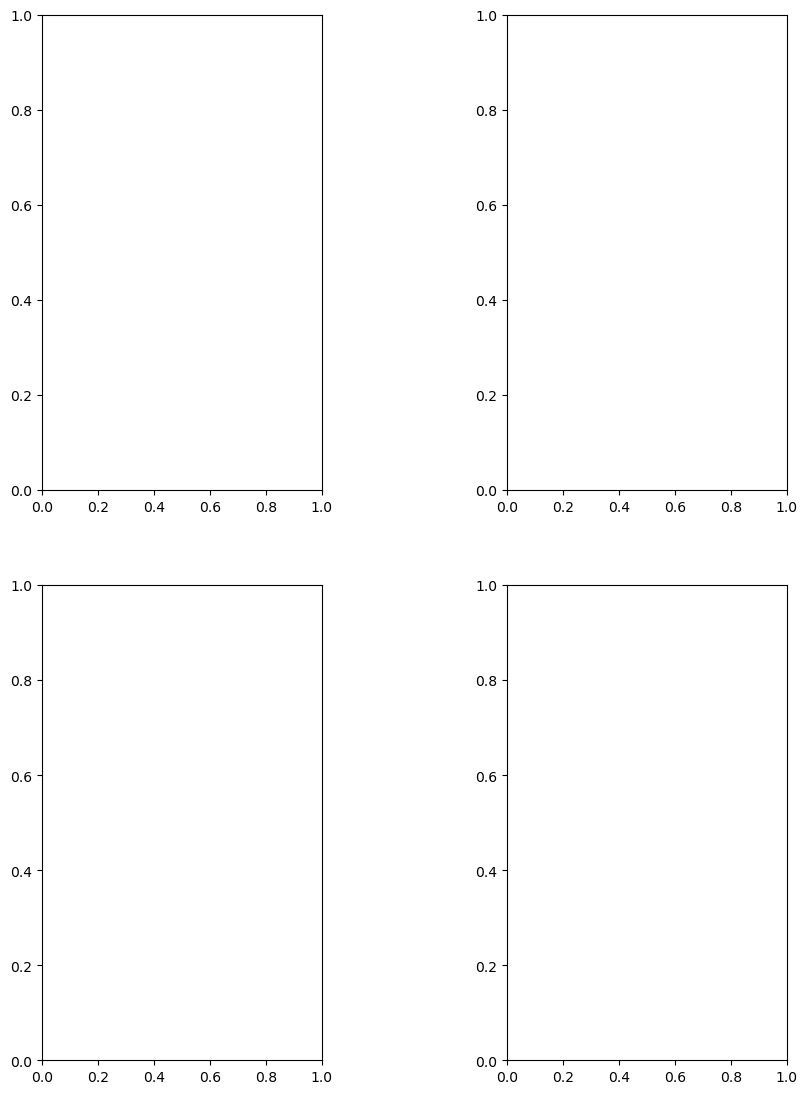

In [3]:
n_rows, n_cols = 2, 2
aspect_ratio = len(ds_model['x'])/len(ds_model['y'])
subplot_width = 4
subplot_height = subplot_width / aspect_ratio
plt.rcParams["figure.figsize"] = ((n_cols+0.75)*subplot_width, n_rows*subplot_height)
fig, ax = plt.subplots(n_rows, n_cols)

for axis in ax.flatten():
    axis.set_box_aspect(1/aspect_ratio)

fancyPlotter.plot_normal(ds_bm5_40kms['xModel'], ds_bm5_40kms['yModel'], 
                         ds_bm5_40kms['H'].data-ds_model['H'].data,
                         cmap = 'jet', nbins = 100, fig = fig, ax = ax[0, 0])

fancyPlotter.plot_normal(ds_bm5_40kms['xModel'], ds_bm5_40kms['yModel'], 
                         ds_fake_bm5_40kms['zl'].data >= 0,
                         cmap = 'jet', nbins = 100, fig = fig, ax = ax[0, 1])

fancyPlotter.plot_normal(ds_bm5_40kms['xModel'], ds_bm5_40kms['yModel'], 
                         ds_bm5_40kms['H'].data-ds_model["H"].data,
                         cmap = 'jet', vmin = -1000, vmax = 1000, nbins = 100, fig = fig, ax = ax[1, 0])

fancyPlotter.plot_normal(ds_bm5_40kms['xModel'], ds_bm5_40kms['yModel'], 
                         ds_bm5_40kms['H'].data-ds_model_nudged["H"].data,
                         cmap = 'jet', vmin = -1000, vmax = 1000, nbins = 100, fig = fig, ax = ax[1, 1])

plt.tight_layout()

In [ ]:
costs = 0.5*(ds_model["H"].data - ds_bm5_40kms["H"].data)**2/ds_bm5_40kms["H_uncert"].data**2 * (ds_bm5_40kms["H"].data >= 0)
cost = np.sum(costs)
cost

In [ ]:
costs = 0.5*(ds_model["zl"].data - ds_bm5_40kms["zl"].data)**2/ds_bm5_40kms["zl_uncert"].data**2 * (ds_bm5_40kms["H"].data >= 700)
cost = np.sum(costs)
cost

In [ ]:
costs = 0.5*(ds_model["zl"].data - ds_bm5_40kms["zl"].data)**2/ds_bm5_40kms["zl_uncert"].data**2 * (ds_bm5_40kms["zl"].data >= 700)
cost = np.sum(costs)
cost

In [ ]:
n_rows, n_cols = 2, 3
aspect_ratio = len(ds_model['x'])/len(ds_model['y'])
subplot_width = 4
subplot_height = subplot_width / aspect_ratio
plt.rcParams["figure.figsize"] = ((n_cols+1.0)*subplot_width, n_rows*subplot_height)
fig, ax = plt.subplots(n_rows, n_cols)

for axis in ax.flatten():
    axis.set_box_aspect(1/aspect_ratio)

fancyPlotter.plot_normal(ds_bm5_40kms['xModel'], ds_bm5_40kms['yModel'], 
                         (ds_bm5_40kms['zl'].data-ds_model["zl"].data)*(ds_model["H"].data>0),
                         cmap = 'jet', vmin = -1000, vmax = 1000, nbins = 100, fig = fig, ax = ax[0, 0])

fancyPlotter.plot_normal(ds_bm5_40kms['xModel'], ds_bm5_40kms['yModel'], 
                         (ds_bm5_40kms['zl'].data-ds_model_nudged["zl"].data)*(ds_model_nudged["H"].data>0),
                         cmap = 'jet', vmin = -1000, vmax = 1000, nbins = 100, fig = fig, ax = ax[0, 1])

fancyPlotter.plot_normal(ds_bm5_40kms['xModel'], ds_bm5_40kms['yModel'], 
                         (ds_bm5_40kms['zs'].data-ds_model["zs"].data)*(ds_bm5_40kms["H"].data>=700),
                         cmap = 'RdBu_r', vmin = -1000, vmax = 1000, nbins = 100, fig = fig, ax = ax[0, 2])

fancyPlotter.plot_normal(ds_bm5_40kms['xModel'], ds_bm5_40kms['yModel'], 
                         (ds_bm5_40kms['H'].data > 700),
                         cmap = 'jet', nbins = 100, fig = fig, ax = ax[1, 0])

fancyPlotter.plot_normal(ds_bm5_40kms['xModel'], ds_bm5_40kms['yModel'], 
                         (ds_bm5_40kms['H'].data > 0),
                         cmap = 'jet', nbins = 100, fig = fig, ax = ax[1, 1])

fancyPlotter.plot_normal(ds_bm5_40kms['xModel'], ds_bm5_40kms['yModel'], 
                         (ds_bm5_40kms['zl'].data-ds_model["zl"].data)*(ds_bm5_40kms["H"].data>=700),
                         cmap = 'RdBu_r', vmin = -1000, vmax = 1000, nbins = 100, fig = fig, ax = ax[1, 2])

plt.tight_layout()